In [2]:

import json
import os
from tqdm import tqdm
def calculate_precision_recall(gt_class, pred_class):
    gt_rels = set(gt_class)
    pred_rels = set(pred_class)
    # Calculate the number of true positives (tp), false positives (fp), and false negatives (fn)
    tp = len(gt_rels & pred_rels)
    fp = len(pred_rels - gt_rels)
    fn = len(gt_rels - pred_rels)
    # Calculate precision and recall
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    return precision, recall

def calculate_tpfpfn(gt_class, pred_class):
    gt_rels = set(gt_class)
    pred_rels = set(pred_class)
    # Calculate the number of true positives (tp), false positives (fp), and false negatives (fn)
    tp = len(gt_rels & pred_rels)
    fp = len(pred_rels - gt_rels)
    fn = len(gt_rels - pred_rels)
    return tp, fp, fn

def calculate_PRF1(tp, fp, fn):
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0
    return precision, recall, f1

def evaluation_metrics(data_path):

    base = [json.loads(q) for q in open(data_path, "r")]
    correct_single=0
    incorrect_single=0
    count = 0
    tp_total = 0
    fp_total = 0
    fn_total = 0
    for answers in tqdm(base):
        question_text = answers['prompt']
        if question_text.endswith("Answer in one word or a short phrase."):
            mode = "single"
        elif question_text.endswith("Answer with all applicable classes separated by commas."):
            mode = "multi"
        
        gt=answers['ground_truth'].lower()
        if mode == "single":
            if gt==answers['text'].lower():
                correct_single=correct_single+1
            else:
                incorrect_single=incorrect_single+1

        elif mode == "multi":
            gt_obj = [label.strip() for label in gt.split(",")]
            answer_obj = [an.strip() for an in answers['text'].lower().split(",")]
            tp, fp, fn = calculate_tpfpfn(gt_obj, answer_obj)
            tp_total+=tp
            fp_total+=fp
            fn_total+=fn
            count += 1
            
    print('correct_scene:',correct_single)
    print('incorrect_scene:',incorrect_single)
    print('Total:',correct_single+incorrect_single)
    if (correct_single+incorrect_single)>0:
        print('Scene Classify Accuracy:',(correct_single/(correct_single+incorrect_single)))

    precision_total, recall_total, f1_total = calculate_PRF1(tp_total, fp_total, fn_total)
    print(f'New Average Precision: {precision_total:.4f}')
    print(f'New Average Recall: {recall_total:.4f}')
    print(f'New F1 score: {f1_total:.4f}')
#evaluation_metrics("/mnt/public/vila-1.5/our_results/imageclassify/vila_train_sisv_sftV2.jsonl")
'''
evaluation_metrics("/mnt/public/vila-1.5/our_results/imageclassify/vila_train_sisv_sftV3.jsonl")

evaluation_metrics("/mnt/public/vila-1.5/our_results/imageclassify/vila_train_sisv_pretrain_35wV2.jsonl")

#evaluation_metrics("/mnt/public/vila-1.5/our_results/imageclassify/vila_train_sisv_pretrain_35w.jsonl")
#evaluation_metrics("/mnt/public/vila-1.5/our_results/imageclassify/vila_train_sisv_pretrain_35w_att.jsonl")

#evaluation_metrics("/mnt/public/vila-1.5/our_results/imageclassify/vila_train_sisv_pretrain_35w_attV2.jsonl")
evaluation_metrics("/mnt/public/vila-1.5/our_results/imageclassify/vila_train_sisv_pretrain_35w_clean.jsonl")

evaluation_metrics("/mnt/public/vila-1.5/our_results/imageclassify/vila_train_sisv_pretrain_att_35w_clean.jsonl")
evaluation_metrics("/mnt/public/vila-1.5/our_results/imageclassify/vila_train_sisv_pretrain_att_100w_clean.jsonl")
evaluation_metrics("/mnt/public/vila-1.5/our_results/imageclassify/vila_train_sisv_pretrain_att_186w_clean.jsonl")

evaluation_metrics("/mnt/public/vila-1.5/our_results/imageclassify/vila_train_all_sisv_pretrain_att_186w_clean.jsonl")
evaluation_metrics("/mnt/public/vila-1.5/paper_results/imageclassify/vila_train_all_sisv_pretrain_att_186w_clean.jsonl")
evaluation_metrics("/mnt/public/vila-1.5/paper_results/imageclassify/vila_train_all_sisv_pretrain_att_186w_clean_3b.jsonl")

evaluation_metrics("/mnt/public/vila-1.5/paper_results/imageclassify/vila_train_all_sisv_clean_8b.jsonl")

evaluation_metrics("/mnt/public/vila-1.5/paper_results/imageclassify/vila_train_all_sisv_pretrain_186w_clean_only_si.jsonl")
evaluation_metrics("/mnt/public/vila-1.5/paper_results/imageclassify/vila_train_all_sisv_pretrain_186w_clean_only_sv.jsonl")
evaluation_metrics("/mnt/public/vila-1.5/paper_results/imageclassify/vila_train_all_sisv_pretrain_186w_clean.jsonl")

evaluation_metrics("/mnt/public/vila-1.5/paper_results/imageclassify/vila_train_all_sisv_att_186w_clean_13bV2.jsonl")
evaluation_metrics("/mnt/public/vila-1.5/last_results/imageclassify/vila_train_all_sisv_pretrain_att_186w_clean_8BV3.jsonl")

evaluation_metrics("/mnt/public/vila-1.5/rebuttal_results/imageclassify/vila_train_all_sisv_pretrain_att_100w_clean_8b.jsonl")

evaluation_metrics("/mnt/public/vila-1.5/paper_results/imageclassify/vila_train_all_sisv_pretrain_att_186w_clean_3b.jsonl")
evaluation_metrics("/mnt/public/vila-1.5/paper_results/imageclassify/vila_train_all_sisv_att_186w_clean_13bV2.jsonl")

evaluation_metrics("/data3/zhangxin/wuwen/vila-1.5/rebuttal_results/imageclassify/vila_train_all_sisv_pretrain_att_35w_clean_8bV2.jsonl")
evaluation_metrics("/data3/zhangxin/wuwen/vila-1.5/rebuttal_results/imageclassify/vila_train_all_sisv_pretrain_att_35w_clean_8bV4.jsonl")

evaluation_metrics("/data3/zhangxin/wuwen/vila-1.5/rebuttal_results/imageclassify/vila_train_all_sisv_pretrain_att_100w_clean_8b.jsonl")

evaluation_metrics("/data3/zhangxin/wuwen/vila-1.5/rebuttal_results/imageclassify/Llama-3-VILA1.5-8B.jsonl")
vila_train_all_sisv_pretrain_att_186w_clean_8B_llava_instruct150k
evaluation_metrics("/data3/zhangxin/wuwen/vila-1.5/benchmark_results/aid/vila_train_all_clean_8B_vqa.jsonl")
evaluation_metrics("/data3/zhangxin/wuwen/vila-1.5/benchmark_results/UCMerced_LandUse/vila_train_all_clean_8B_vqa.jsonl")
'''
evaluation_metrics("/data3/zhangxin/wuwen/vila-1.5/last_results/imageclassify/vila_train_all_sisv_pretrain_att_186w_clean_8B_llava_instruct150k.jsonl")
evaluation_metrics("/data3/zhangxin/wuwen/vila-1.5/last_results/imageclassify/vila_train_all_sisv_pretrain_att_sharegpt4v_186w_clean_8B_llava_instruct150k.jsonl")


100%|██████████| 8668/8668 [00:00<00:00, 299105.12it/s]


correct_scene: 3959
incorrect_scene: 397
Total: 4356
Scene Classify Accuracy: 0.9088613406795225
New Average Precision: 0.8428
New Average Recall: 0.8164
New F1 score: 0.8294


100%|██████████| 8668/8668 [00:00<00:00, 580501.48it/s]

correct_scene: 3886
incorrect_scene: 470
Total: 4356
Scene Classify Accuracy: 0.8921028466483012
New Average Precision: 0.8635
New Average Recall: 0.7785
New F1 score: 0.8188


In [3]:
#分类通用
import json

from tqdm import tqdm
def evaluation_metrics(data_path):
        
    base = [json.loads(q) for q in open(data_path, "r")]#[:1000]
    correct=0
    incorrect=0
    for answers in tqdm(base):
        gt=answers['ground_truth'].split('/')[0].lower().replace('.','')
        answer=answers['text'].replace(' ','').lower().replace('.','')
        if gt==answer:
                correct=correct+1
        else:
                incorrect=incorrect+1
        # else:
        #     continue
    print('correct:',correct)
    print('incorrect:',incorrect)
    print('Total:',correct+incorrect)
    print('Acc:',(correct/(correct+incorrect)))
'''   
evaluation_metrics("/mnt/public/vila-1.5/our_results/citylocation/vila_train_sample_pretrain_add_sft.jsonl")
  
evaluation_metrics('/mnt/public/vila-1.5/our_results/citylocation/vila_train_sample_pretrain_att_sft.jsonl')
evaluation_metrics("/mnt/public/vila-1.5/our_results/citylocation/vila_train_sample_pretrain_att_add_sft.jsonl")
evaluation_metrics("/mnt/public/vila-1.5/our_results/citylocation/vila_train_sample_pretrain_att_0915_sft.jsonl")

evaluation_metrics("/mnt/public/vila-1.5/our_results/citylocation/vila_train_sample_pretrain_0916_sft.jsonl")
'''
#evaluation_metrics("/mnt/public/vila-1.5/our_results/citylocation/vila_train_sisv_sftV2.jsonl")
#evaluation_metrics("/mnt/public/vila-1.5/our_results/citylocation/vila_train_sisv_sftV3.jsonl")
#evaluation_metrics("/mnt/public/vila-1.5/our_results/citylocation/vila_train_sisv_pretrain_35w.jsonl")
#evaluation_metrics("/mnt/public/vila-1.5/our_results/citylocation/vila_train_sisv_pretrain_35wV2.jsonl")
#evaluation_metrics("/mnt/public/vila-1.5/our_results/citylocation/vila_train_sisv_pretrain_35w_att.jsonl")
#evaluation_metrics("/mnt/public/vila-1.5/our_results/citylocation/vila_train_sisv_pretrain_35w_attV2.jsonl")

#evaluation_metrics("/mnt/public/vila-1.5/our_results/citylocation/vila_train_sisv_pretrain_35w_clean.jsonl")

#evaluation_metrics("/mnt/public/vila-1.5/our_results/citylocation/vila_train_sisv_pretrain_att_35w_clean.jsonl")
'''
evaluation_metrics("/mnt/public/vila-1.5/our_results/citylocation/vila_train_sisv_pretrain_att_100w_clean.jsonl")
evaluation_metrics("/mnt/public/vila-1.5/our_results/citylocation/vila_train_sisv_pretrain_att_186w_clean.jsonl")
evaluation_metrics("/mnt/public/vila-1.5/paper_results/citylocation/vila_train_all_sisv_pretrain_att_186w_clean_3b.jsonl")
evaluation_metrics("/mnt/public/vila-1.5/paper_results/citylocation/vila_train_all_sisv_clean_8b.jsonl")



evaluation_metrics("/mnt/public/vila-1.5/paper_results/sv/CityLoc/vila_train_all_sisv_clean_8b.jsonl")
evaluation_metrics("/mnt/public/vila-1.5/paper_results/sv/CityLoc/vila_train_all_sisv_pretrain_186w_clean_only_si.jsonl")

evaluation_metrics("/mnt/public/vila-1.5/paper_results/sv/CityLoc/vila_train_all_sisv_pretrain_186w_clean_only_sv.jsonl")
evaluation_metrics("/mnt/public/vila-1.5/paper_results/sv/CityLoc/vila_train_all_sisv_pretrain_186w_clean.jsonl")
#evaluation_metrics("/mnt/public/vila-1.5/paper_results/citylocation/vila_train_all_sisv_pretrain_att_186w_clean_13b.jsonl")
evaluation_metrics("/mnt/public/vila-1.5/paper_results/sv/CityLoc/vila_train_all_sisv_pretrain_att_186w_clean.jsonl")
evaluation_metrics("/mnt/public/vila-1.5/paper_results/sv/CityLoc/vila_train_all_sisv_pretrain_att_186w_clean_3b.jsonl")

evaluation_metrics("/mnt/public/vila-1.5/paper_results/citylocation/vila_train_all_sisv_pretrain_att_186w_clean_13b.jsonl")
evaluation_metrics("/mnt/public/vila-1.5/paper_results/citylocation/vila_train_all_sisv_att_90w_clean_13bV2_our_task.jsonl")
#evaluation_metrics("/mnt/public/vila-1.5/paper_results/UCMerced_LandUse/vila_train_all_sisv_pretrain_att_186w_clean.jsonl")


evaluation_metrics("/mnt/public/vila-1.5/paper_results/citylocation/vila_train_all_sisv_pretrain_att_186w_clean.jsonl")
evaluation_metrics("/mnt/public/vila-1.5/paper_results/citylocation/vila_train_all_sisv_pretrain_att_186w_clean_3b.jsonl")
evaluation_metrics("/mnt/public/vila-1.5/paper_results/citylocation/vila_train_all_sisv_pretrain_att_186w_clean_3b.jsonl")

evaluation_metrics("/mnt/public/vila-1.5/paper_results/citylocation/vila_train_all_sisv_clean_8b.jsonl")
evaluation_metrics("/mnt/public/vila-1.5/paper_results/citylocation/vila_train_all_sisv_pretrain_186w_clean_only_si.jsonl")
evaluation_metrics("/mnt/public/vila-1.5/paper_results/citylocation/vila_train_all_sisv_pretrain_186w_clean_only_sv.jsonl")



evaluation_metrics("/mnt/public/vila-1.5/our_results/sv/CityLoc/vila_train_sisv_sftV2.jsonl")vila_train_all_sisv_pretrain_186w_clean

evaluation_metrics("/mnt/public/vila-1.5/our_results/sv/CityLoc/vila_train_sisv_pretrain_35wV2.jsonl")

evaluation_metrics("/mnt/public/vila-1.5/our_results/sv/CityLoc/vila_train_all_sisv_att_186w_clean_13bV2.jsonl")

evaluation_metrics("/data3/zhangxin/wuwen/vila-1.5/rebuttal_results/citylocation/vila_train_all_sisv_pretrain_att_35w_clean_8bV2.jsonl")
evaluation_metrics("/data3/zhangxin/wuwen/vila-1.5/rebuttal_results/citylocation/vila_train_all_sisv_pretrain_att_100w_clean_8b.jsonl")
evaluation_metrics("/data3/zhangxin/wuwen/vila-1.5/rebuttal_results/citylocation/vila_train_all_sisv_pretrain_att_35w_clean_8bV3.jsonl")
evaluation_metrics("/data3/zhangxin/wuwen/vila-1.5/rebuttal_results/citylocation/vila_train_all_sisv_pretrain_att_35w_clean_8bV4.jsonl")
evaluation_metrics("/data3/zhangxin/wuwen/vila-1.5/rebuttal_results/citylocation/Llama-3-VILA1.5-8B.jsonl")
'''

evaluation_metrics("/data3/zhangxin/wuwen/vila-1.5/last_results/citylocation/vila_train_all_sisv_pretrain_att_186w_clean_8B_llava_instruct150k.jsonl")
evaluation_metrics("/data3/zhangxin/wuwen/vila-1.5/last_results/citylocation/vila_train_all_sisv_pretrain_att_sharegpt4v_186w_clean_8B_llava_instruct150k.jsonl")


100%|██████████| 4646/4646 [00:00<00:00, 955935.07it/s]

correct: 4355
incorrect: 291
Total: 4646
Acc: 0.9373654756780025


100%|██████████| 4646/4646 [00:00<00:00, 1379689.63it/s]

correct: 4386
incorrect: 260
Total: 4646
Acc: 0.9440378820490745


In [5]:
evaluation_metrics("/data3/zhangxin/wuwen/vila-1.5/general_results/realworldqa/Llama-3-VILA1.5-8B.jsonl")
evaluation_metrics("/data3/zhangxin/wuwen/vila-1.5/general_results/realworldqa/vila_train_all_sisv_pretrain_186w_clean.jsonl")

evaluation_metrics("/data3/zhangxin/wuwen/vila-1.5/general_results/realworldqa/vila_train_all_sisv_pretrain_att_186w_clean_8B_vqa.jsonl")


evaluation_metrics("/data3/zhangxin/wuwen/vila-1.5/general_results/realworldqa/pretrain_att_186w_clean.jsonl")
evaluation_metrics("/data3/zhangxin/wuwen/vila-1.5/general_results/realworldqa/vila_train_all_sisv_pretrain_186w_clean.jsonl")

evaluation_metrics("/data3/zhangxin/wuwen/vila-1.5/general_results/realworldqa/vila_train_all_sisv_pretrain_att_186w_clean.jsonl")
evaluation_metrics("/data3/zhangxin/wuwen/vila-1.5/general_results/realworldqa/vila_train_all_sisv_pretrain_att_186w_clean_8B_llava_instruct150k.jsonl")


#evaluation_metrics("/data3/zhangxin/wuwen/vila-1.5/general_results/mmstar/vila_train_all_sisv_pretrain_att_186w_clean_8B_llava_instruct150k.jsonl")

evaluation_metrics("/data3/zhangxin/wuwen/vila-1.5/general_results/realworldqa/vila_train_all_sisv_pretrain_att_sharegpt4v_186w_clean_8B_llava_instruct150k.jsonl")


evaluation_metrics("/data3/zhangxin/wuwen/vila-1.5/general_results/mmstar/vila_train_all_sisv_pretrain_att_sharegpt4v_186w_clean_8B_llava_instruct150k.jsonl")
evaluation_metrics("/data3/zhangxin/wuwen/vila-1.5/general_results/mmstar/vila_train_all_sisv_pretrain_att_186w_clean_8B_llava_instruct150k.jsonl")

100%|██████████| 727/727 [00:00<00:00, 840711.06it/s]


correct: 385
incorrect: 342
Total: 727
Acc: 0.5295735900962861


100%|██████████| 727/727 [00:00<00:00, 664471.35it/s]


correct: 110
incorrect: 617
Total: 727
Acc: 0.15130674002751032


100%|██████████| 727/727 [00:00<00:00, 619264.62it/s]


correct: 126
incorrect: 601
Total: 727
Acc: 0.1733149931224209


100%|██████████| 727/727 [00:00<00:00, 102262.36it/s]


correct: 2
incorrect: 725
Total: 727
Acc: 0.002751031636863824


100%|██████████| 727/727 [00:00<00:00, 716798.07it/s]


correct: 110
incorrect: 617
Total: 727
Acc: 0.15130674002751032


100%|██████████| 727/727 [00:00<00:00, 771183.36it/s]


correct: 285
incorrect: 442
Total: 727
Acc: 0.3920220082530949


100%|██████████| 727/727 [00:00<00:00, 772159.79it/s]


correct: 307
incorrect: 420
Total: 727
Acc: 0.422283356258597


100%|██████████| 727/727 [00:00<00:00, 761363.05it/s]

correct: 362
incorrect: 365
Total: 727
Acc: 0.49793672627235214


100%|██████████| 1500/1500 [00:00<00:00, 888749.26it/s]


correct: 599
incorrect: 901
Total: 1500
Acc: 0.3993333333333333


100%|██████████| 1500/1500 [00:00<00:00, 852963.12it/s]

correct: 512
incorrect: 988
Total: 1500
Acc: 0.3413333333333333


In [17]:
from tqdm import tqdm

import json
def evaluation_metrics(data_path):
        
    base = [json.loads(q) for q in open(data_path, "r")]
    # collect categories
    all_categories = set(answers['category'] for answers in base)
    category_correct = {category: 0 for category in all_categories}
    category_incorrect = {category: 0 for category in all_categories}

    correct=0
    incorrect=0
    for answers in tqdm(base):
        gt=answers['ground_truth'].lower()
        answer=answers['text'].lower()
        category = answers['category'].lower()
        if gt==answer:
            correct=correct+1
            category_correct[category] += 1
        else:
            incorrect=incorrect+1
            category_incorrect[category] += 1
            
    overall_correct = 0
    overall_total = 0

    print("\nCategory-wise accuracies:")
    for cat, cat_corr in category_correct.items():
        cat_total_count = cat_corr + category_incorrect[cat]
        cat_acc = cat_corr/cat_total_count
        
        print(f"{cat}: {cat_corr}/{cat_total_count} ({cat_acc*100:.2f}%)")
        
        overall_correct += cat_corr
        overall_total += cat_total_count
    
    overall_acc = overall_correct / overall_total

    print(f"Overall Acc: {overall_acc*100:.2f}%")

#evaluation_metrics("/mnt/public/vila-1.5/our_results/vqa/vila_train_sisv_sftV2.jsonl")
#evaluation_metrics("/mnt/public/vila-1.5/our_results/vqa/vila_train_sisv_sftV3.jsonl")

#evaluation_metrics("/mnt/public/vila-1.5/our_results/vqa/vila_train_sisv_pretrain_35wV2.jsonl")

#evaluation_metrics("/mnt/public/vila-1.5/our_results/vqa/vila_train_sisv_pretrain_35w_att.jsonl")

#evaluation_metrics("/mnt/public/vila-1.5/our_results/vqa/vila_train_sisv_pretrain_35w_attV2.jsonl")
#evaluation_metrics("/mnt/public/vila-1.5/our_results/vqa/vila_train_sisv_pretrain_35w_clean.jsonl")

#evaluation_metrics("/mnt/public/vila-1.5/our_results/vqa/vila_train_sisv_pretrain_att_35w_clean.jsonl")

#evaluation_metrics("/mnt/public/vila-1.5/our_results/vqa/vila_train_sisv_pretrain_att_100w_clean.jsonl")
#evaluation_metrics("/mnt/public/vila-1.5/our_results/vqa/vila_train_all_sisv_pretrain_att_186w_clean.jsonl")
#evaluation_metrics("/mnt/public/vila-1.5/paper_results/vqa/vila_train_all_sisv_pretrain_att_186w_clean_3b.jsonl")
#evaluation_metrics("/mnt/public/vila-1.5/paper_results/vqa/vila_train_all_sisv_pretrain_att_186w_clean.jsonl")
#evaluation_metrics("/mnt/public/vila-1.5/paper_results/spatial/vila_train_all_sisv_pretrain_att_186w_clean.jsonl")
#evaluation_metrics("/mnt/public/vila-1.5/paper_results/vqa/vila_train_all_sisv_pretrain_att_186w_clean_3b.jsonl")
#evaluation_metrics("/mnt/public/vila-1.5/paper_results/spatial/vila_train_all_sisv_pretrain_att_186w_clean_3b.jsonl")
#evaluation_metrics("/mnt/public/vila-1.5/paper_results/vqa/vila_train_all_sisv_clean_8b.jsonl")
#evaluation_metrics("/mnt/public/vila-1.5/paper_results/spatial/vila_train_all_sisv_clean_8b.jsonl")

#evaluation_metrics("/mnt/public/vila-1.5/paper_results/spatial/vila_train_all_sisv_pretrain_186w_clean_only_si.jsonl")
#evaluation_metrics("/mnt/public/vila-1.5/paper_results/vqa/vila_train_all_sisv_pretrain_186w_clean_only_si.jsonl")


'''
evaluation_metrics("/mnt/public/vila-1.5/paper_results/vqa/vila_train_all_sisv_clean_8b.jsonl")

evaluation_metrics("/mnt/public/vila-1.5/paper_results/vqa/vila_train_all_sisv_pretrain_186w_clean_only_si.jsonl")
evaluation_metrics("/mnt/public/vila-1.5/paper_results/vqa/vila_train_all_sisv_pretrain_186w_clean_only_sv.jsonl")
evaluation_metrics("/mnt/public/vila-1.5/paper_results/spatial/vila_train_all_sisv_pretrain_186w_clean.jsonl")
evaluation_metrics("/mnt/public/vila-1.5/paper_results/spatial/vila_train_all_sisv_pretrain_att_186w_clean.jsonl")

evaluation_metrics("/mnt/public/vila-1.5/paper_results/vqa/vila_train_all_sisv_att_186w_clean_13bV2.jsonl")
evaluation_metrics("/mnt/public/vila-1.5/rebuttal_results/vqa/vila_train_all_sisv_pretrain_att_100w_clean_8b.jsonl")
'''
'''

evaluation_metrics("/data3/zhangxin/wuwen/vila-1.5/rebuttal_results/spatial/vila_train_all_sisv_pretrain_att_35w_clean_8bV2.jsonl")

evaluation_metrics("/data3/zhangxin/wuwen/vila-1.5/rebuttal_results/spatial/vila_train_all_sisv_pretrain_att_100w_clean_8b.jsonl")
evaluation_metrics("/data3/zhangxin/wuwen/vila-1.5/rebuttal_results/spatial/vila_train_all_sisv_pretrain_att_35w_clean_8bV4.jsonl")
evaluation_metrics("/data3/zhangxin/wuwen/vila-1.5/rebuttal_results/spatial/Llama-3-VILA1.5-8B.jsonl")
evaluation_metrics("/data3/zhangxin/wuwen/vila-1.5/rebuttal_results/spatial/vila_train_all_sisv_pretrain_att_186w_clean_8B_llava_instruct150k.jsonl")

#evaluation_metrics("/data3/zhangxin/wuwen/vila-1.5/rebuttal_results/vqa/vila_train_all_sisv_pretrain_att_35w_clean_8bV2.jsonl")
#evaluation_metrics("/data3/zhangxin/wuwen/vila-1.5/rebuttal_results/vqa/vila_train_all_sisv_pretrain_att_35w_clean_8bV3.jsonl")
evaluation_metrics("/data3/zhangxin/wuwen/vila-1.5/rebuttal_results/vqa/vila_train_all_sisv_pretrain_att_35w_clean_8bV4.jsonl")

evaluation_metrics("/data3/zhangxin/wuwen/vila-1.5/rebuttal_results/vqa/vila_train_all_sisv_pretrain_att_100w_clean_8b.jsonl")
evaluation_metrics("/data3/zhangxin/wuwen/vila-1.5/rebuttal_results/vqa/Llama-3-VILA1.5-8B.jsonl")
evaluation_metrics("/data3/zhangxin/wuwen/vila-1.5/rebuttal_results/vqa/vila_train_all_sisv_pretrain_att_100w_clean_8b.jsonl")
'''
evaluation_metrics("/data3/zhangxin/wuwen/vila-1.5/last_results/vqa/vila_train_all_sisv_pretrain_att_186w_clean_8B_llava_instruct150k.jsonl")
evaluation_metrics("/data3/zhangxin/wuwen/vila-1.5/last_results/spatial/vila_train_all_sisv_pretrain_att_186w_clean_8B_llava_instruct150k.jsonl")
evaluation_metrics("/data3/zhangxin/wuwen/vila-1.5/last_results/vqa/vila_train_all_sisv_pretrain_att_sharegpt4v_186w_clean_8B_llava_instruct150k.jsonl")
evaluation_metrics("/data3/zhangxin/wuwen/vila-1.5/last_results/spatial/vila_train_all_sisv_pretrain_att_sharegpt4v_186w_clean_8B_llava_instruct150k.jsonl")


100%|██████████| 5556/5556 [00:00<00:00, 943005.54it/s]



Category-wise accuracies:
count: 739/1553 (47.59%)
compare: 337/378 (89.15%)
presence: 1714/1769 (96.89%)
relationship: 1748/1856 (94.18%)
Overall Acc: 81.68%


100%|██████████| 8250/8250 [00:00<00:00, 1072329.73it/s]



Category-wise accuracies:
object: 1454/2026 (71.77%)
subject: 975/2031 (48.01%)
exist: 1497/2000 (74.85%)
relationship: 779/2193 (35.52%)
Overall Acc: 57.03%


100%|██████████| 5556/5556 [00:00<00:00, 2031873.14it/s]



Category-wise accuracies:
count: 751/1553 (48.36%)
compare: 334/378 (88.36%)
presence: 1717/1769 (97.06%)
relationship: 1759/1856 (94.77%)
Overall Acc: 82.09%


100%|██████████| 8250/8250 [00:00<00:00, 2214734.25it/s]


Category-wise accuracies:
object: 1533/2026 (75.67%)
subject: 1246/2031 (61.35%)
exist: 1772/2000 (88.60%)
relationship: 969/2193 (44.19%)
Overall Acc: 66.91%


/data1/zhangxin/.local/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mse: 13.626240118577075
mae: 2.9282608695652175
r2: -0.8824377079043177
rmse: 3.691373744092716
---------------


/data1/zhangxin/.local/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mse: 5.9739447024060786
mae: 1.7031447868298861
r2: 0.3238231481475752
rmse: 2.4441654408828546
---------------


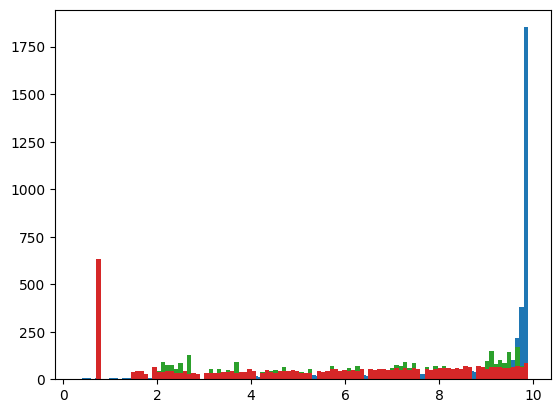

In [11]:
import sklearn.metrics as metrics
import json
import   re
def compute_accuracy_regression(pred_list, true_list):
    mse = metrics.mean_squared_error(true_list, pred_list)
    mae = metrics.mean_absolute_error(true_list, pred_list)
    r2 = metrics.r2_score(true_list, pred_list)
    
    rmse = metrics.mean_squared_error(true_list, pred_list, squared=False)
    return mse, mae, r2,rmse

def evaluation_metrics(data_path):
    data = []
    with open(data_path, 'r') as file:
        for line in file:
            data.append(json.loads(line))
            




    pred_list = [] 
    true_list = [] 

    for item in data:
        sdg_str = item['text']
        #print(coordinates_str)
        # 去除字符串中的括号并按逗号分割，然后转换为浮点数
        #只匹配text中的经纬度
        match = re.search(r"(\d+\.\d+)", sdg_str)
        if match:
            
            rating = float(match.group(0))
            if rating!=0.1:
                pred_list.append(rating)  # 将元组添加到列表中
            
                sdg_str = str(item['ground_truth'])
                match = re.search(r"(\d+\.\d+)", sdg_str)
                if match:
                    
                    rating = float(match.group(0))
                    true_list.append(rating)  # 将元组添加到列表中
            
    
    mse, mae, r2,rmse = compute_accuracy_regression(pred_list, true_list)
    import matplotlib.pyplot as plt
    plt.hist(pred_list,bins=100)
    plt.hist(true_list,bins=100)
    print('mse:',mse)
    print('mae:',mae)
    print('r2:',r2)
    print('rmse:',rmse)
    
    print("---------------")


json_file_path = '/mnt/public/vila-1.5/our_results/pop/vila_train_sample_pretrain_att_sft.jsonl'
'''
evaluation_metrics(json_file_path)
evaluation_metrics("/mnt/public/vila-1.5/our_results/pop/vila_train_sample_pretrain_att_0915_sft.jsonl")

evaluation_metrics("/mnt/public/vila-1.5/our_results/pop/vila_train_sample_pretrain_add_sft.jsonl")
evaluation_metrics("/mnt/public/vila-1.5/our_results/pop/vila_train_sample_pretrain_att_add_sft.jsonl")

evaluation_metrics("/mnt/public/vila-1.5/our_results/pop/vila_train_sample_pretrain_0916_sft.jsonl")

evaluation_metrics("/mnt/public/vila-1.5/our_results/pop/vila_train_sisv_pretrain_35w_att.jsonl")
evaluation_metrics("/mnt/public/vila-1.5/our_results/pop/vila_train_sisv_pretrain_35w.jsonl")
evaluation_metrics("/mnt/public/vila-1.5/our_results/pop/vila_train_sisv_pretrain_35wV2.jsonl")
evaluation_metrics("/mnt/public/vila-1.5/our_results/pop/vila_train_sisv_sftV2.jsonl")
'''
#evaluation_metrics("/mnt/public/vila-1.5/our_results/sv/PlacePulse_more_beautiful/vila_train_sisv_sftV2.jsonl")

#evaluation_metrics("/mnt/public/vila-1.5/our_results/pop/vila_train_sisv_sftV2.jsonl")
#evaluation_metrics("/mnt/public/vila-1.5/our_results/pop/vila_train_sisv_sftV3.jsonl")

#evaluation_metrics("/mnt/public/vila-1.5/our_results/pop/vila_train_sisv_pretrain_35w.jsonl")
#evaluation_metrics("/mnt/public/vila-1.5/our_results/pop/vila_train_sisv_pretrain_35wV2.jsonl")


#evaluation_metrics("/mnt/public/vila-1.5/our_results/pop/vila_train_sisv_pretrain_35w_att.jsonl")
#evaluation_metrics("/mnt/public/vila-1.5/our_results/pop/vila_train_sisv_pretrain_35w_attV2.jsonl")
'''
evaluation_metrics("/mnt/public/vila-1.5/our_results/pop/vila_train_sisv_pretrain_35w_clean.jsonl")

evaluation_metrics("/mnt/public/vila-1.5/our_results/pop/vila_train_sisv_pretrain_att_35w_clean.jsonl")
evaluation_metrics("/mnt/public/vila-1.5/our_results/pop/vila_train_sisv_pretrain_att_100w_clean.jsonl")
evaluation_metrics("/mnt/public/vila-1.5/our_results/pop/vila_train_sisv_pretrain_att_186w_clean.jsonl")


#evaluation_metrics("/mnt/public/vila-1.5/paper_results/pop/vila_train_all_sisv_pretrain_att_186w_clean_3b.jsonl")
evaluation_metrics("/mnt/public/vila-1.5/paper_results/pop/vila_train_all_sisv_pretrain_att_186w_clean.jsonl")

evaluation_metrics("/mnt/public/vila-1.5/paper_results/nightlight/vila_train_all_sisv_pretrain_att_186w_clean.jsonl")
evaluation_metrics("/mnt/public/vila-1.5/paper_results/pop/vila_train_all_sisv_pretrain_att_186w_clean_3b.jsonl")

evaluation_metrics("/mnt/public/vila-1.5/paper_results/nightlight/vila_train_all_sisv_pretrain_att_186w_clean_3b.jsonl")
evaluation_metrics("/mnt/public/vila-1.5/paper_results/nightlight/vila_train_all_sisv_clean_8b.jsonl")
evaluation_metrics("/mnt/public/vila-1.5/paper_results/pop/vila_train_all_sisv_clean_8b.jsonl")
evaluation_metrics("/mnt/public/vila-1.5/paper_results/nightlight/vila_train_all_sisv_pretrain_186w_clean_only_si.jsonl")
evaluation_metrics("/mnt/public/vila-1.5/paper_results/pop/vila_train_all_sisv_pretrain_186w_clean_only_si.jsonl")
evaluation_metrics("/mnt/public/vila-1.5/paper_results/nightlight/vila_train_all_sisv_pretrain_att_186w_clean_13b.jsonl")
evaluation_metrics("/mnt/public/vila-1.5/paper_results/nightlight/vila_train_all_sisv_att_90w_clean_13bV2_our_task.jsonl")
evaluation_metrics("/mnt/public/vila-1.5/paper_results/nightlight/vila_train_all_sisv_att_186w_clean_13bV2.jsonl")
evaluation_metrics("/mnt/public/vila-1.5/paper_results/pop/vila_train_all_sisv_att_186w_clean_13bV2.jsonl")
evaluation_metrics("/mnt/public/vila-1.5/1113_results/pop/vila_train_all_sisv_pretrain_att_186w_clean.jsonl")


'''
evaluation_metrics("/data3/zhangxin/wuwen/vila-1.5/citybench/pop/vila_train_all_sisv_pretrain_att_186w_clean.jsonl")
evaluation_metrics("/data3/zhangxin/wuwen/vila-1.5/citybench/pop/vila_train_all_sisv_pretrain_att_186w_clean_8b_pop.jsonl")

In [2]:
import json
with open('/data1/zhangxin/llm/code/LLaVA/result/lrben/llava-v1.5-7b-remoteclip/1_0.jsonl', 'r') as file:
    data = [json.loads(line) for line in file]
    
with open('/data1/zhangxin/llm/data/Geochat_Data/GeoChat_Bench/all_answers.json', 'r') as file:
    all_answers = [json.loads(line) for line in file]
    
question_id_to_answer = {}
for item in all_answers[0]["answers"]:
    question_id_to_answer[item['question_id']] = item['answer']
    
new_data = []
for item in data:
    new_item = item
    new_item['ground_truth_ans'] = question_id_to_answer[item['question_id']]
    new_data.append(new_item)

In [23]:
with open("/mnt/public/data/FIT-RS/eval/FIT-RSFG_FIT-RSFG-Bench_test_FITRS_complex_comprehension_eval.jsonl","r") as f:
    fitrsrc = [json.loads(line) for line in f]

In [26]:
import numpy as np
import re
with open("/mnt/public/data/FIT-RS/eval/FIT-RSFG_FIT-RSFG-Bench_test_FITRS_complex_comprehension_eval.jsonl","r") as f:
    fitrsrc = [json.loads(line) for line in f]
def obb2poly_np_oc(rbboxes):
    """Convert oriented bounding boxes to polygons.

    Args:
        obbs (ndarray): [x_ctr,y_ctr,w,h,angle,score]

    Returns:
        polys (ndarray): [x0,y0,x1,y1,x2,y2,x3,y3,score]
    """
    x = rbboxes[0]
    y = rbboxes[1]
    w = rbboxes[2]
    h = rbboxes[3]
    a = rbboxes[4]
    cosa = np.cos(a)
    sina = np.sin(a)
    wx, wy = w / 2 * cosa, w / 2 * sina
    hx, hy = -h / 2 * sina, h / 2 * cosa
    p1x, p1y = x - wx - hx, y - wy - hy
    p2x, p2y = x + wx - hx, y + wy - hy
    p3x, p3y = x + wx + hx, y + wy + hy
    p4x, p4y = x - wx + hx, y - wy + hy
    polys = np.stack([p1x, p1y, p2x, p2y, p3x, p3y, p4x, p4y])
    polys = np.expand_dims(polys, axis=0)
    return polys

def convert_obb_to_region_str(rbox_np):
    angle = rbox_np[-1]
    polys = obb2poly_np_oc(rbox_np)
    x_left = np.clip(np.min(polys[:, [0, 2, 4, 6]], axis=1), 0, None)
    y_top = np.clip(np.min(polys[:, [1, 3, 5, 7]], axis=1), 0, None)
    x_right = np.max(polys[:, [0, 2, 4, 6]], axis=1)
    y_bottom = np.max(polys[:, [1, 3, 5, 7]], axis=1)
    region_str = f"<{int(x_left[0])}><{int(y_top[0])}><{int(x_right[0])}><{int(y_bottom[0])}>|<{int(angle)}>"
    return region_str

for j in range(len(fitrsrc)):
    image_file=fitrsrc[j]['image']
    # 判断问题类别,进而确定模板
    category = fitrsrc[j]['category']
    qs = fitrsrc[j]['question']
    # 需要的区域任务要针对geochat进行OBB的格式转换
    if category in ["task4", "task5", "task6"]:
        # if 'fgrs' not in answers_file.split("/")[-1] and 'geochat' in answers_file.split("/")[-1]:
        pattern = r'\{(.+?)\}'
        matches = re.findall(pattern, qs)
        for match in matches:
            numbers_str = match
            pattern = r'<(.+?)>'
            numbers = re.findall(pattern, numbers_str)
            rbox_np = np.array(numbers, dtype=float)
            region_str = convert_obb_to_region_str(rbox_np)
            fitrsrc[j]['question'] = qs.replace(numbers_str, region_str)
with open("/mnt/public/data/FIT-RS/eval/FIT-RSFG_FIT-RSFG-Bench_test_FITRS_complex_comprehension_eval_2ploygon.jsonl", 'w') as f:
    for item in fitrsrc:
        json.dump(item, f)
        f.write('\n')

In [18]:
import argparse
import torch
import os
import json
from tqdm import tqdm
import re
from sgg_eval import Compute_Pred_Matches
from vg_eval import do_vg_evaluation
import numpy as np
from eval_map import eval_rbbox_map 
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning)

# ## all categories
label_id = ['airplane', 'boat', 'taxiway', 'boarding_bridge', 'tank', 'ship', 'crane',
            'car', 'apron', 'dock', 'storehouse', 'goods_yard', 'truck', 'terminal',
            'runway', 'breakwater', 'car_parking', 'bridge', 'cooling_tower',
            'truck_parking', 'chimney', 'vapor', 'coal_yard', 'genset', 'smoke',
            'gas_station', 'lattice_tower', 'substation', 'containment_vessel', 'flood_dam', 'ship_lock', 'gravity_dam',
            'arch_dam', 'cement_concrete_pavement', 'toll_gate', 'tower_crane', 'engineering_vehicle', 'unfinished_building', 'foundation_pit',
            'wind_mill', 'intersection', 'roundabout', 'ground_track_field', 'soccer_ball_field', 'basketball_court', 'tennis_court', 'baseball_diamond', 'stadium']

# ## all relationships
relations = ['over', 'not co-storage with', 'connect', 'parallelly parked on', 'intersect', 'co-storage with', 'converge','parallelly docked at', 'adjacent', 'within safe distance of', 'through', 'approach', 'away from', 'randomly parked on', 'run along', 'isolatedly parked on', 'around', 'randomly docked at', 'drive off',
             'drive toward', 'within danger distance of','supply to','isolatedly docked at','pass across','not run along','slightly emit','exhaust to','violently emit',
             'incorrectly parked on', 'pass under', 'directly transmit electricity to','indirectly transmit electricity to', 'pass through','within same line of', 'within different line of','directly connected to','indirectly connected to','driving in the same direction with',
             'driving in the opposite direction with', 'driving alongside with','driving in the same lane with','driving in the different lane with','working on','not working on','parked alongside with','not parked alongside with',
             'in the same parking with','in the different parking with','parking in the same apron with','parking in the different apron with','running along the same taxiway with','running along the different taxiway with',
             'running along the different runway with','docking at the same breakwater with','docking at the same dock with','docking at the different dock with','docked alongside with','not docked alongside with']

label_id_to_index = {label: index for index, label in enumerate(label_id)}
relation_to_index = {relation: index for index, relation in enumerate(relations)}

# target_id, target_cat, relation, obj_id_count, obj_cat
def convert_to_numpy_triplet(sub_id, sub_cat, rel, obj_id, obj_cat):
    sub_cat_index = label_id_to_index.get(sub_cat, -1)
    rel_index = relation_to_index.get(rel, -1)
    obj_cat_index = label_id_to_index.get(obj_cat, -1)
    return (sub_id, sub_cat_index, rel_index, obj_id, obj_cat_index)


def obb2poly_np_oc(rbboxes):
    """Convert oriented bounding boxes to polygons.

    Args:
        obbs (ndarray): [x_ctr,y_ctr,w,h,angle,score]

    Returns:
        polys (ndarray): [x0,y0,x1,y1,x2,y2,x3,y3,score]
    """
    x = rbboxes[0]
    y = rbboxes[1]
    w = rbboxes[2]
    h = rbboxes[3]
    a = rbboxes[4]
    cosa = np.cos(a)
    sina = np.sin(a)
    wx, wy = w / 2 * cosa, w / 2 * sina
    hx, hy = -h / 2 * sina, h / 2 * cosa
    p1x, p1y = x - wx - hx, y - wy - hy
    p2x, p2y = x + wx - hx, y + wy - hy
    p3x, p3y = x + wx + hx, y + wy + hy
    p4x, p4y = x - wx + hx, y - wy + hy
    polys = np.stack([p1x, p1y, p2x, p2y, p3x, p3y, p4x, p4y])
    polys = np.expand_dims(polys, axis=0)
    return polys


# 过滤过小box,否则后续计算会出错
def filter_rbox(rbox):
    if len(rbox) == 5:
        _, _, w, h, _ = rbox
    elif len(rbox) == 6:
        _, _, w, h, _, _ = rbox
    else: # 长度不对
        return False
    if w < 2 or h < 2:
        return False
    # elif w < 10 or h <10:
    #     rbox[2] = rbox[2]*10
    #     rbox[3] = rbox[3]*10 #放大
    else:
        return True
    
def convert_obb_to_region_str(rbox_np):
    angle = rbox_np[-1]
    polys = obb2poly_np_oc(rbox_np)
    x_left = np.clip(np.min(polys[:, [0, 2, 4, 6]], axis=1), 0, None)
    y_top = np.clip(np.min(polys[:, [1, 3, 5, 7]], axis=1), 0, None)
    x_right = np.max(polys[:, [0, 2, 4, 6]], axis=1)
    y_bottom = np.max(polys[:, [1, 3, 5, 7]], axis=1)
    region_str = f"<{int(x_left[0])}><{int(y_top[0])}><{int(x_right[0])}><{int(y_bottom[0])}>|<{int(angle)}>"
    return region_str


def extract_rbox_from_str(match, 
                          pattern = r'<(.*?)>'):
    '''
    input: <cx><cy><w><h>|<angle> (under 'oc' definition, angle is degree), str '<cx><cy><w><h>|<angle>'
    output: (cx, cy, w, h, angle) (angle is rad)
    '''
    numbers_str = re.findall(pattern, match)
    try:
        rbox = np.array(numbers_str, dtype=float)
    except ValueError:
        default_rbox =np.array([0.,0.,0.,0.,0], dtype=float)
        rbox = default_rbox
    if len(rbox) ==0: #没提取到
        return np.array([0.,0.,0.,0.,0], dtype=float)
    rbox[-1] = np.deg2rad(rbox[-1])
    return rbox

def extract_multi_rboxes_from_str(input_str):
    # 定义正则表达式模式，用于匹配每个矩形框
    pattern = r'\{(<.*?>)\}'
    # 使用正则表达式找到所有的矩形框
    matches = re.findall(pattern, input_str)
    rboxes = []
    # default_rbox = '({<-3><-3><3><3>|<0>})'
    default_rbox =np.array([0.,0.,0.,0.,0], dtype=float)
    for match in matches:
        # 在每个矩形框中，找到所有的数字
        numbers_str = re.findall(r'<(.*?)>', match)
        # 将数字转换为浮点数，并将角度转换为弧度
        try:
            rbox = np.array(numbers_str, dtype=float)
        except ValueError:
            # 如果转换失败，返回默认的数组
            rbox = default_rbox
        rbox[-1] = np.deg2rad(rbox[-1])
        # if filter_rbox(rbox):
        rboxes.append(rbox)
    # 将所有的矩形框参数合并成一个 numpy 数组
    return np.array(rboxes)


### for list convert to numpy for calculate mAP
def convert_list_to_rboxeval(det_result_input, annotation_input):
    det_results = [[] for _ in range(len(det_result_input))]
    num_classes = len(label_id)
    annotations = []
    # 遍历每个图像的检测结果
    for i, image_results in enumerate(det_result_input):
        ## 1) 处理annotation_input为要求格式
        image_annotations = annotation_input[i]
        bboxes = []
        labels = []
        # 遍历这个图像的每个注释
        for annotation in image_annotations:
            # 将这个注释的bbox和label添加到结果列表中
            bboxes.append(annotation['bbox'])
            labels.append(annotation['category_id'])
        if not bboxes:
            continue
        bboxes = np.vstack(bboxes)
        labels = np.array(labels)
        # 将这个图像的bbox和label结果添加到总结果列表中
        annotations.append({'bboxes': bboxes, 'labels': labels})
        ## 2) 处理det_result_input为要求格式
        # 初始化一个列表来保存每个类别的检测结果
        per_class_results = [np.zeros((0, 6)) for _ in range(num_classes)]
        per_class_tmp_list = [[] for _ in range(num_classes)]
        # 遍历这个图像的每个检测结果
        for result in image_results:
            # 将这个检测结果添加到对应类别的结果列表中
            category_id = result['category_id']
            per_class_tmp_list[category_id].append(result['bbox'])
        # 将每个类别的结果合并为一个 (n, 6) 的数组，并添加到总结果列表中
        for j in range(num_classes):
            if per_class_tmp_list[j]:
                per_class_results[j] = np.vstack(per_class_tmp_list[j])
        det_results[i] = per_class_results

    det_results = [x for x in det_results if x!=[]]
    return det_results, annotations

### for task2
def calculate_relationships_acc(gt_relationships, pred_relationships):
    gt_rels = set(gt_relationships)
    pred_rels = set(pred_relationships)
    # Calculate the number of true positives (tp), false positives (fp), and false negatives (fn)
    tp = len(gt_rels & pred_rels)
    fp = len(pred_rels - gt_rels)
    fn = len(gt_rels - pred_rels)
    # Calculate precision and recall
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    return precision, recall

def calculate_relationships_tpfp(gt_relationships, pred_relationships):
    gt_rels = set(gt_relationships)
    pred_rels = set(pred_relationships)
    # Calculate the number of true positives (tp), false positives (fp), and false negatives (fn)
    tp = len(gt_rels & pred_rels)
    fp = len(pred_rels - gt_rels)
    fn = len(gt_rels - pred_rels)
    return tp,fp,fn

def calculate_relationships_PRF1(tp, fp, fn):
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0
    return precision, recall, f1

def parse_single_triplet(triplet_str):
    # 使用正则表达式找到三元组的各个部分
    region1 = re.findall(r'subject: (.+?),', triplet_str)
    region2 = re.findall(r'object: (.+?),', triplet_str)
    # 这里是单类别1对1, 还未考虑1对多匹配
    relationship = re.findall(r'<rel>(.*?)</rel>', triplet_str)
    # 如果任何一个部分的格式不正确，返回 None
    if len(region1) == 0 or len(region2) == 0 or len(relationship) == 0:
        return [], [], []
    
    return region1[0], region2[0], relationship

def parse_multi_catgory_rbox(input_string, add_score = False):
    # 提取所有的目标类别和对应的rbox
    pattern = r'<ref>(.*?)</ref><rbox>\((.*?)\)</rbox>'
    matches = re.findall(pattern, input_string)
    categories = []
    rboxes = []
    for match in matches:
        # 提取类别，并转换为对应的label_id
        category = match[0]
        if category.endswith('s'):
            category = category[:-1]
        category_id = label_id_to_index.get(category, -1)
        categories.append(category_id)
        # 提取rbox，并转换为numpy数组
        rbox_strs = match[1]
        tmp_rboxes = extract_multi_rboxes_from_str(rbox_strs)
        num_obj = tmp_rboxes.shape[0]
        for i in range(num_obj):
            rbox = tmp_rboxes[i]
            if add_score:
                rbox = np.append(rbox, 1.0)
            if filter_rbox(rbox):
                rboxes.append(rbox)

    if len(rboxes) > 0:
        rboxes_categories = list(zip(map(tuple, rboxes), categories))
        rboxes_categories = list(dict.fromkeys(rboxes_categories))
        rboxes, categories = zip(*rboxes_categories)
        rboxes = [np.array(rbox) for rbox in rboxes]

    det_result_per_image = [{'bbox': rbox, 'category_id': category_id} for rbox, category_id in zip(rboxes, categories)]
    
    return det_result_per_image

def parse_multi_rbox_nocatgory(input_string, add_score = False):
    pattern = r'(\{.*?\})'
    matches = re.findall(pattern, input_string)
    categories = []
    rboxes = []
    for match in matches:
        # 提取目标类别，并转换为对应的label_id
        category_id = 1 # 默认值
        categories.append(category_id)
        # 提取rbox，并转换为numpy数组
        rbox = extract_rbox_from_str(match)
        if add_score:
            rbox = np.append(rbox, 1.0)
        if filter_rbox(rbox):
            rboxes.append(rbox)
    if len(rboxes) > 0:
        # 将rboxes和categories合并为一个列表，每个元素是一个元组(rbox, category_id)
        rboxes_categories = list(zip(map(tuple, rboxes), categories))
        # 使用dict来删除重复的元素并保持原始顺序
        rboxes_categories = list(dict.fromkeys(rboxes_categories))
        # 分离rboxes和categories
        rboxes, categories = zip(*rboxes_categories)
        # 将rboxes转换回numpy.ndarray
        rboxes = [np.array(rbox) for rbox in rboxes]
    ##
    det_result_per_image = [{'bbox': rbox, 'category_id': category_id} for rbox, category_id in zip(rboxes, categories)]
    return det_result_per_image


size = ["small", "medium", "large", "giant"]

RBOX_START = '<rbox>'
RBOX_END = '</rbox>'
REF_START = '<ref>'
REF_END = '</ref>'
REL_START = '<rel>'
REL_END = '</rel>'

#### for Task5
def extract_triplets_from_str(str, if_gt=True):
    # 提取指示目标(区域)类别
    target_cat=''
    target=''
    match = re.search(r'(.*) on the .* part of the image', str.split('.')[0])
    if match is not None:
        target = match.group(1)
        for s in size:
            if s in target:
                match = re.search(s + r' (.*)', target)
                if match is None:
                    target = ''
                else:
                    target = match.group(1)
                # target_cat = re.search(s + r' (.*)', target).group(1)
                break
    elif target == '' and if_gt != True: # 对于answer,如果回答中第一句格式不标准,无类别则用gt的类别来代替
        #print('first sentence:',str.split('.')[0])
        target_cat=if_gt

    # 提取关系和其他对象
    # relations = re.findall(r'(\d+)? (.*?) \((.*?)\).*?<(.*)>', str)
    # 根据句号"."进行断句, 逐句提取三元组
    sentences = str.replace('\n', ' ').split('. ')[1:]
    triplets = []
    bboxes = []
    gt_bboxes = np.array((50.,50.,20.,20.,0.))
    obj_id_count = 1
    target_id = 0

    default_rel = 'background'
    default_ref = 'background'
    default_rbox = '({<0.><0.><0.><0.>|<0>})'
    # 在每一句中寻找relation ("<>"内的短语)
    for sentence in sentences:
        if sentence == "":
            continue
        sentence = sentence.lower()
        relation = re.findall(r'<rel>(.*?)</rel>', sentence)
        obj_cat = re.findall(r'<ref>(.*?)</ref>', sentence)
        unknow_boxes_str = re.findall(r'<rbox>(.*?)</rbox>', sentence)

        relation = next((item for item in re.findall(r'<rel>(.*?)</rel>', sentence)), default_rel)
        obj_cat = next((item for item in re.findall(r'<ref>(.*?)</ref>', sentence)), default_ref)
        unknow_boxes_str = next((item for item in re.findall(r'<rbox>(.*?)</rbox>', sentence)), default_rbox)

        rboxes_ = extract_multi_rboxes_from_str(unknow_boxes_str)
        count = int(rboxes_.shape[0])

        if "it is" in sentence:  # it-<rel>-obj
            # 考虑复数
            if count > 1 and obj_cat.endswith('s'):
                obj_cat = obj_cat[:-1]
            obj_rboxes = rboxes_
            for i in range(count):
                if filter_rbox(obj_rboxes[i]):
                    triplets.append(convert_to_numpy_triplet(target_id, target_cat, relation, obj_id_count, obj_cat))
                    bboxes.append((gt_bboxes, obj_rboxes[i]))
                    obj_id_count += 1
        elif "> it" in sentence: # subj-<rel>-it
            if count > 1 and obj_cat.endswith('s'):
                obj_cat = obj_cat[:-1]
            obj_rboxes = rboxes_
            for i in range(count):
                if filter_rbox(obj_rboxes[i]):
                    triplets.append(convert_to_numpy_triplet(obj_id_count, obj_cat, relation, target_id, target_cat))
                    bboxes.append((obj_rboxes[i], gt_bboxes))
                    obj_id_count += 1

    if if_gt==True:            
        return triplets, bboxes, target_cat
    else:
        return triplets, bboxes

#### for Task6
def extract_triplets_from_str_task6(str, add_score = False):
    
    sentences = str.replace('\n', ' ').split('. ')
    triplets = []
    bboxes = []
    # det_results_per_image = [] 
    rboxes_score = []
    categories = []
    id_count = 0 
    
    for sentence in sentences:
        sentence = sentence.lower()
        if "sorry" in sentence and add_score == False:  # gt为负样本
            continue
        # Find all <rel> tags
        relation = re.findall(r'<rel>(.*?)</rel>', sentence)
        ## 1) SGG
        if relation:  
            relation = relation[0]
            ref_values = re.findall(r'<ref>(.*?)</ref>', sentence)
            rbox_values = re.findall(r'<rbox>(.*?)</rbox>', sentence)
            
            default_ref = 'background'  # 考虑错误情况
            default_rbox = '({<0.><0.><0.><0.>|<0>})'  # 考虑错误情况
            
            if len(ref_values)>2:
                ref_values=ref_values[:2]
                rbox_values=rbox_values[:2]
            
            while len(ref_values) < 2:
                ref_values.append(default_ref)
            subj_cat, obj_cat = ref_values
            
            while len(rbox_values) < 2:
                rbox_values.append(default_rbox)
            subj_boxes_str, obj_boxes_str = rbox_values

            # 考虑复数
            if subj_cat.endswith('s'):
                subj_cat = subj_cat[:-1]
            if obj_cat.endswith('s'):
                obj_cat = obj_cat[:-1]
            subj_rboxes = extract_multi_rboxes_from_str(subj_boxes_str)
            obj_rboxes = extract_multi_rboxes_from_str(obj_boxes_str)
            num_subj = subj_rboxes.shape[0]
            if obj_rboxes.shape[0] == 0:
                continue
            assert obj_rboxes.shape[0] <=1
            obj_rboxes = obj_rboxes[0]
            if not filter_rbox(obj_rboxes):
                continue

            for i in range(num_subj):
                if filter_rbox(subj_rboxes[i]):
                    triplets.append(convert_to_numpy_triplet(id_count, subj_cat, relation, id_count+1, obj_cat))
                    bboxes.append((subj_rboxes[i], obj_rboxes))  # 这里注意形状要是一维数组
                    id_count += 2
        
        ## 2) Object Detection
        elif not relation and RBOX_START in sentence:
            default_ref = 'background'
            default_rbox = '({<0.><0.><0.><0.>|<0>})'
            category = next((item for item in re.findall(r'<ref>(.*?)</ref>', sentence)), default_ref)
            rboxes_str = next((item for item in re.findall(r'<rbox>(.*?)</rbox>', sentence)), default_rbox)

            # 1) extract category
            if category.endswith('s'):
                category = category[:-1]
            # 2) extract rboxes in ground truth and answer
            rboxes = extract_multi_rboxes_from_str(rboxes_str)
            num_obj = rboxes.shape[0]
            for i in range(num_obj):
                rbox = rboxes[i]
                if add_score:
                    rbox = np.append(rbox, 1.0)
                if filter_rbox(rbox):
                    # 添加得分
                    rboxes_score.append(rbox)
                    # categories.append(label_id.index(category))
                    categories.append(label_id_to_index.get(category, -1))
            # det_result_per_image = [{'bbox': rbox, 'category_id': label_id.index(category)} for rbox in rboxes_score]
    
    det_results_per_image = [{'bbox': rbox, 'category_id': category_id} for rbox, category_id in zip(rboxes_score, categories)]
    
    return triplets, bboxes, det_results_per_image


def evaluation_metrics_ComplexCompre(data_path):

    base = [json.loads(q) for q in open(data_path, "r")]
    ######## pre definition #########
    ## Task1 Object Detection
    det_results_task1 = [[] for _ in range(len(base))]
    gt_annotations_task1 = [[] for _ in range(len(base))]
    ## Task2 Relation Detection
    count_task2 = 0
    recall_task2 = 0
    precision_task2 = 0
    tp_task2 = 0
    fp_task2 = 0
    fn_task2 = 0
    ## Task3 Relation Reasoning
    recall_task3 = 0
    tp_task3 = 0
    fp_task3 = 0
    fn_task3 = 0
    ## Task4 Object Reasoning
    det_results_task4 = [[] for _ in range(len(base))]
    gt_annotations_task4 = [[] for _ in range(len(base))]
    ## Task5 Region Grounding
    gt_inputs_task5 = []
    predictions_task5 = []
    ## Task6 Image Grounding
    gt_inputs_task6 = []
    predictions_task6 = []
    det_results_task6 = [[] for _ in range(len(base))]
    gt_annotations_task6 = [[] for _ in range(len(base))]

    ################################
    # for answers in tqdm(base):
    for i, answers in enumerate(tqdm(base)):
        # image_id = answers['image_id']
        gt = answers['ground_truth']
        answer = answers['answer']
        task_category = answers['category']
        
        if "due to the context length" in gt or "..." in gt:  # NOTE: too long to evaluate, "..."则是出现在grounding任务中
            continue
        pattern_loc = r'\{(.+?)\}'
        pattern_ = r'<(.+?)>'
        if task_category == "task1": # Object Detection## Metrics: mAP for all, mean IoU
            # 1) extract category
            category_match = re.search(r'There (?:is|are) \d+ (.+?)s? in the image', gt)
            if category_match is None:  # 负样本
                continue
            category = category_match.group(1)
            category = category.rstrip('s')
            # 2) extract rboxes in ground truth and answer
            rbox_matches_gt = re.findall(pattern_loc, gt)
            rboxes_gt = []
            for match in rbox_matches_gt:
                rbox = extract_rbox_from_str(match)
                if filter_rbox(rbox):
                    rboxes_gt.append(rbox)
            rbox_matches_pre = re.findall(pattern_loc, answer)
            rboxes_pre = []
            for match in rbox_matches_pre:
                rbox = extract_rbox_from_str(match)
                if filter_rbox(rbox):
                    rbox = np.append(rbox, 1.0)
                    rboxes_pre.append(rbox)
            # 3) append to det_results and gt_annotations
            det_results_per_image1 = [{'bbox': rbox, 'category_id': label_id_to_index.get(category, -1)} for rbox in rboxes_pre]
            det_results_task1[i].extend(det_results_per_image1)
            gt_annotations_per_image1 = [{'bbox': rbox, 'category_id': label_id_to_index.get(category, -1)} for rbox in rboxes_gt]

            gt_annotations_task1[i].extend(gt_annotations_per_image1)
            continue

        elif task_category == "task2": # Relationship Detection
            # "ground_truth": "There are 2 relationships between tank and tank: tank <not co-storage with> tank, tank <co-storage with> tank"
            # Metrics: Recall, Precision
            pattern_r = re.compile(r'<(.*?)>')
            rel_gt = re.findall(pattern_r, gt)
            rel_pre = re.findall(pattern_r, answer)
            tp,fp,fn = calculate_relationships_tpfp(rel_gt, rel_pre)
            tp_task2 +=tp
            fp_task2 +=fp
            fn_task2 +=fn
            continue

        elif task_category == "task3": # Referring Relationship Reasoning
            cat1_gt, cat2_gt, rel_gt = parse_single_triplet(gt)
            cat1_pre, cat2_pre, rel_pre = parse_single_triplet(answer)
            if not rel_gt:  # 负样本
                continue
            # calculate accuracy
            # acc为单标签分类,用于多标签时不会考虑顺序
            if cat1_gt == cat1_pre and cat2_gt == cat2_pre:
                tp,fp,fn = calculate_relationships_tpfp(rel_gt, rel_pre)
                tp_task3 +=tp
                fp_task3 +=fp
                fn_task3 +=fn
            elif cat1_pre!=[] and cat2_pre!=[]: # 类别预测错误
                tp = 0
                fp = len(rel_pre)
                fn = len(rel_gt)
            else:  # 类别预测为空
                tp = 0
                fp = 0
                fn = len(rel_gt)
            continue

        elif task_category == "task4": # Object Reasoning
            if 'categories' in gt:  # 类别+box
                det_results_per_image4 = parse_multi_catgory_rbox(answer, add_score=True)
                gt_annotations_per_image4 = parse_multi_catgory_rbox(gt)
            else:  # 仅box
                det_results_per_image4 = parse_multi_rbox_nocatgory(answer, add_score=True)
                gt_annotations_per_image4 = parse_multi_rbox_nocatgory(gt)
            det_results_task4[i].extend(det_results_per_image4)
            gt_annotations_task4[i].extend(gt_annotations_per_image4)
            continue

        elif task_category == "task5": #  Region Grounding
            obj_gt = re.findall(pattern_loc, gt)
            if not obj_gt:  # gt不含rbox tag, 无法计算三元组
                continue
            # obj_pre = re.findall(pattern_loc, answer)
            ## 1) 首先从gt和prediction分别提取三元组、关系
            # 提取目标对象并保存提及的三元组
            gt_triplets, gt_bboxes, target_cat = extract_triplets_from_str(gt, if_gt=True)
            pre_triplets, pre_bboxes = extract_triplets_from_str(answer, if_gt=target_cat)
            ## 2) 按照SGG中的eval方式来进行评估
            # Compute_Pred_Matches(gt_triplets, pre_triplets, gt_bboxes, pre_bboxes, iou_thres=0.5, phrdet=False)
            gt_input = {'gt_triplet':gt_triplets, 'gt_bboxes': gt_bboxes}
            prediction = {'pred_triplet':pre_triplets, 'pred_bboxes':pre_bboxes}
            gt_inputs_task5.append(gt_input)
            predictions_task5.append(prediction)
            continue

        elif task_category == "task6": #  Image Grounding
            obj_gt = re.findall(pattern_loc, gt)
            if not obj_gt:  # gt不含grounding标签, 无法计算三元组
                continue
            if 'sorry' in gt:  # negative sample
                continue
            gt_triplets_t6, gt_bboxes_t6, gt_annotations_per_image6 = extract_triplets_from_str_task6(gt)
            pre_triplets_t6, pre_bboxes_t6, det_results_per_image6 = extract_triplets_from_str_task6(answer, add_score=True)

            ## 2) 按照SGG中的eval方式来进行评估
            # Compute_Pred_Matches(gt_triplets, pre_triplets, gt_bboxes, pre_bboxes, iou_thres=0.5, phrdet=False)
            gt_input_t6 = {'gt_triplet':gt_triplets_t6, 'gt_bboxes': gt_bboxes_t6}
            prediction_t6 = {'pred_triplet':pre_triplets_t6, 'pred_bboxes':pre_bboxes_t6}
            gt_inputs_task6.append(gt_input_t6)
            predictions_task6.append(prediction_t6)

            ## 目标检测评估
            gt_annotations_task6[i].extend(gt_annotations_per_image6)
            det_results_task6[i].extend(det_results_per_image6)

    ######## Output Results #######
    iou_thr = 0.25
    print(f"=======iou thr: {iou_thr}========")
    ### Task1
    # convert format
    det_task_1, gt_task_1 = convert_list_to_rboxeval(det_results_task1, gt_annotations_task1)
    # eval map
    mean_ap_1, result_1 = eval_rbbox_map(det_task_1, gt_task_1, iou_thr=iou_thr)
    print(f"Task-Object Detection mean ap: {mean_ap_1}")
    ## Task 2
    # 新方式
    precision_task2, recall_task2, f1_task2 = calculate_relationships_PRF1(tp_task2, fp_task2, fn_task2)
    print(f'Task-Relation Detection Average Precision: {precision_task2:.4f}')
    print(f'Task-Relation Detection Average Recall: {recall_task2:.4f}')
    print(f'Task-Relation Detection F1 score: {f1_task2:.4f}')

    ### Task 3
    precision_task3, recall_task3, f1_task3 = calculate_relationships_PRF1(tp_task3, fp_task3, fn_task3)
    print(f'Task-Relation Reasoning Average Precision: {precision_task3:.4f}')
    print(f'Task-Relation Reasoning Average Recall: {recall_task3:.4f}')
    print(f'Task-Relation Reasoning F1 score: {f1_task3:.4f}')

    ### Task 4
    det_task_4, gt_task_4 = convert_list_to_rboxeval(det_results_task4, gt_annotations_task4)
    # eval map
    mean_ap_4, result_4 = eval_rbbox_map(det_task_4, gt_task_4, iou_thr=iou_thr)
    print(f"Task-Object Reasoning mean ap: {mean_ap_4}")
    ### Task 5
    print("Task-Region-level SGG result:")
    do_vg_evaluation(gt_inputs_task5, predictions_task5, iou_thres=[iou_thr])
    ## Task 6
    print("Task-Image-level SGG result:")
    do_vg_evaluation(gt_inputs_task6, predictions_task6, iou_thres=[iou_thr])
    det_task_6, gt_task_6 = convert_list_to_rboxeval(det_results_task6, gt_annotations_task6)
    mean_ap_6, _ = eval_rbbox_map(det_task_6, gt_task_6, iou_thr=iou_thr)
    print(f"Task-Image-level SGG mean ap: {mean_ap_6}")



evaluation_metrics_ComplexCompre("/mnt/public/vila-1.5/our_results/com/vila_train_sisv_pretrain_35w_att.jsonl")


100%|██████████| 11174/11174 [00:00<00:00, 22154.39it/s]

=======iou thr: 0.25========



/mnt/public/vila/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/mnt/public/vila/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/mnt/public/vila/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/mnt/public/vila/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_n

[2024-09-19 09:45:10,989] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-09-19 09:45:10,995] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-09-19 09:45:11,106] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-09-19 09:45:11,106] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)


/mnt/public/vila/lib/python3.10/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/mnt/public/vila/lib/python3.10/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/mnt/public/vila/lib/python3.10/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/mnt/public/vila/lib/python3.10/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_no


+-------+-----+------+--------+-------+
| class | gts | dets | recall | ap    |
+-------+-----+------+--------+-------+
| 0     | 227 | 316  | 0.233  | 0.053 |
| 1     | 36  | 75   | 0.000  | 0.000 |
| 2     | 133 | 98   | 0.045  | 0.015 |
| 3     | 121 | 27   | 0.025  | 0.013 |
| 4     | 116 | 202  | 0.207  | 0.038 |
| 5     | 93  | 197  | 0.032  | 0.002 |
| 6     | 99  | 189  | 0.111  | 0.022 |
| 7     | 729 | 752  | 0.067  | 0.010 |
| 8     | 40  | 36   | 0.250  | 0.154 |
| 9     | 31  | 24   | 0.000  | 0.000 |
| 10    | 74  | 45   | 0.149  | 0.049 |
| 11    | 52  | 26   | 0.154  | 0.058 |
| 12    | 68  | 52   | 0.118  | 0.061 |
| 13    | 10  | 9    | 0.000  | 0.000 |
| 14    | 0   | 0    | 0.000  | 0.000 |
| 15    | 4   | 5    | 0.000  | 0.000 |
| 16    | 67  | 54   | 0.090  | 0.018 |
| 17    | 14  | 11   | 0.071  | 0.015 |
| 18    | 0   | 0    | 0.000  | 0.000 |
| 19    | 3   | 3    | 0.000  | 0.000 |
| 20    | 6   | 4    | 0.167  | 0.045 |
| 21    | 5   | 5    | 0.000  | 0.000 |

/mnt/public/vila/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/mnt/public/vila/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/mnt/public/vila/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/mnt/public/vila/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_no

[2024-09-19 09:45:18,873] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-09-19 09:45:18,885] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-09-19 09:45:18,903] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-09-19 09:45:18,916] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)


/mnt/public/vila/lib/python3.10/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/mnt/public/vila/lib/python3.10/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/mnt/public/vila/lib/python3.10/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/mnt/public/vila/lib/python3.10/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_no


+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| 0     | 188  | 130  | 0.069  | 0.009 |
| 1     | 2970 | 2459 | 0.043  | 0.011 |
| 2     | 11   | 12   | 0.000  | 0.000 |
| 3     | 15   | 7    | 0.000  | 0.000 |
| 4     | 52   | 46   | 0.000  | 0.000 |
| 5     | 72   | 53   | 0.028  | 0.004 |
| 6     | 8    | 8    | 0.125  | 0.023 |
| 7     | 409  | 397  | 0.044  | 0.061 |
| 8     | 4    | 3    | 0.500  | 0.455 |
| 9     | 0    | 0    | 0.000  | 0.000 |
| 10    | 1    | 1    | 0.000  | 0.000 |
| 11    | 2    | 0    | 0.000  | 0.000 |
| 12    | 49   | 13   | 0.000  | 0.000 |
| 13    | 2    | 1    | 0.000  | 0.000 |
| 14    | 0    | 0    | 0.000  | 0.000 |
| 15    | 0    | 0    | 0.000  | 0.000 |
| 16    | 0    | 0    | 0.000  | 0.000 |
| 17    | 0    | 0    | 0.000  | 0.000 |
| 18    | 0    | 1    | 0.000  | 0.000 |
| 19    | 0    | 0    | 0.000  | 0.000 |
| 20    | 1    | 1    | 0.000  | 0.000 |
| 21    | 0    

/mnt/public/vila/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/mnt/public/vila/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/mnt/public/vila/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/mnt/public/vila/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_no

[2024-09-19 09:45:28,179] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-09-19 09:45:28,294] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-09-19 09:45:28,303] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-09-19 09:45:28,318] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)


/mnt/public/vila/lib/python3.10/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/mnt/public/vila/lib/python3.10/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/mnt/public/vila/lib/python3.10/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/mnt/public/vila/lib/python3.10/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_no


+-------+-----+------+--------+-------+
| class | gts | dets | recall | ap    |
+-------+-----+------+--------+-------+
| 0     | 92  | 55   | 0.152  | 0.046 |
| 1     | 23  | 6    | 0.043  | 0.045 |
| 2     | 122 | 78   | 0.090  | 0.017 |
| 3     | 52  | 0    | 0.000  | 0.000 |
| 4     | 31  | 8    | 0.032  | 0.023 |
| 5     | 31  | 22   | 0.032  | 0.045 |
| 6     | 54  | 38   | 0.019  | 0.005 |
| 7     | 478 | 183  | 0.013  | 0.005 |
| 8     | 6   | 0    | 0.000  | 0.000 |
| 9     | 4   | 0    | 0.000  | 0.000 |
| 10    | 22  | 11   | 0.091  | 0.045 |
| 11    | 36  | 11   | 0.111  | 0.082 |
| 12    | 63  | 6    | 0.032  | 0.045 |
| 13    | 1   | 0    | 0.000  | 0.000 |
| 14    | 0   | 0    | 0.000  | 0.000 |
| 15    | 2   | 1    | 0.000  | 0.000 |
| 16    | 28  | 4    | 0.000  | 0.000 |
| 17    | 8   | 2    | 0.000  | 0.000 |
| 18    | 2   | 0    | 0.000  | 0.000 |
| 19    | 2   | 0    | 0.000  | 0.000 |
| 20    | 1   | 1    | 0.000  | 0.000 |
| 21    | 0   | 0    | 0.000  | 0.000 |

In [19]:
qs

'[reasoning]There are some cars that are <rel>driving in the same direction with</rel> the object present at <rbox>({<27><39><35><55>|<63>})</rbox>. Could you tell me their locations?'

In [14]:
fitrsrc = [json.loads(line) for line in open("/mnt/public/vila-1.5/paper_results/spatial/vila_train_all_sisv_pretrain_att_186w_clean.jsonl")]
from collections import defaultdict
diff_type_score = defaultdict(list)
for item in fitrsrc:
    if item['text'] == item['ground_truth']:
        diff_type_score[item['category']].append(1)
    else:
        diff_type_score[item['category']].append(0)

In [15]:
for type, type_score in diff_type_score.items():
    print(f"{type}: {100.0 * (sum(type_score) / len(type_score))}")


relationship: 34.92932056543548
exist: 65.0
object: 84.55083909180652
subject: 48.3998030526834


In [8]:
evaluator = TextVQAAccuracyEvaluator()
result = evaluator.eval_pred_list(data)

  0%|          | 0/10004 [00:00<?, ?it/s]


KeyError: 'pred'

In [11]:
import sys
import bisect
def calculate_sum(j, a, prefix_sum, m, n):
    # Find the number of students within [j - n/2, j + n/2]
    # Since it's a circle, handle wrap-around by duplicating the list
    half_n = n / 2
    # To handle integer positions, use floor and ceil appropriately
    left = j - half_n
    right = j + half_n
    if left < 0:
        left += n
    if right >= n:
        right -= n
    # Find the number of a_k within [left, right]
    if left <= right:
        cnt = bisect.bisect_right(a, right) - bisect.bisect_left(a, left)
        sum_inside = prefix_sum[bisect.bisect_right(a, right)] - prefix_sum[bisect.bisect_left(a, left)]
    else:
        # Interval wraps around
        cnt1 = bisect.bisect_right(a, right)
        cnt2 = m - bisect.bisect_left(a, left)
        cnt = cnt1 + cnt2
        sum_inside = (prefix_sum[bisect.bisect_right(a, right)] - prefix_sum[0]) + \
                     (prefix_sum[m] - prefix_sum[bisect.bisect_left(a, left)])
    # Sum of distances inside
    # For sum |j - a_k| where a_k within [left, right]
    # Since a is sorted, split into two parts: a_k <= j and a_k > j
    idx = bisect.bisect_right(a, j)
    sum_left = prefix_sum[idx] - prefix_sum[0]
    sum_right = prefix_sum[bisect.bisect_right(a, right)] - prefix_sum[idx]
    sum_distance_inside = (j * idx - sum_left) + (sum_right - j * (cnt - idx))
    # Sum of distances outside
    cnt_outside = m - cnt
    sum_distance_outside = cnt_outside * n - (prefix_sum[m] - prefix_sum[bisect.bisect_right(a, right)] + prefix_sum[bisect.bisect_left(a, left)])
    # Total sum
    total = sum_distance_inside + sum_distance_outside
    return total

def main():
    import sys
    n, m = map(int,input().split())
    
    a=list(map(int,input().split()))
    a.sort()
    prefix_sum = [0] * (m + 1)
    for i in range(m):
        prefix_sum[i + 1] = prefix_sum[i] + a[i]
    # Ternary search over the possible j
    left = 1
    right = n
    def f(j):
        # Compute the sum of min distances for position j
        total = 0
        for pos in a:
            d = abs(j - pos)
            d = min(d, n - d)
            total += d
        return total
    # Since n can be up to 1e9, use integer ternary search
    while right - left > 3:
        m1 = left + (right - left) // 3
        m2 = right - (right - left) // 3
        f1 = f(m1)
        f2 = f(m2)
        if f1 < f2:
            right = m2
        else:
            left = m1
    # After narrowing down, find the minimum in the remaining range
    min_sum = float('inf')
    best_j = -1
    for j in range(left, right + 1):
        current_sum = f(j)
        if current_sum < min_sum or (current_sum == min_sum and j < best_j):
            min_sum = current_sum
            best_j = j
    print(best_j)

if __name__ == "__main__":
    main()


4


In [6]:
import json


with open("/mnt/public/ALL_DATA_MIXED_NEW/Socioeconomic_median_income_formatted/Socioeconomic_median_income_data_test_1000.json","r") as f:
    temp = json.load(f)

In [12]:
temp[0]

{'sample_id': '6037651101',
 'sub_task': 'median income',
 'conversations': [{'from': 'human',
   'value': "<image><image><image><image><image><image>\nThe images you're viewing are satellite and street views of a census tract in the U.S. How would you rate the median income for this area from 0 to 9.9, with 9.9 being the maximum? Just provide the number. Example format: 'X.X'."},
  {'from': 'gpt', 'value': '8.1'}],
 'image': ['/data3/ouyangtianjian/matched_rs_images/13110_5612.png',
  '/data2/ouyangtianjian/US_StreetView_2500_to_5000_CUT/6037651101/2_8CDE9oWZkxrDS23ohG70Ug&33.81489799948314&-118.3428785979579&15.jpg',
  '/data2/ouyangtianjian/US_StreetView_2500_to_5000_CUT/6037651101/3_10rFzXlIT9cl0foF9kbHgg&33.81146932602454&-118.3431216043606&15.jpg',
  '/data2/ouyangtianjian/NEW_StreetView_Images_US_CUT_merged/US_StreetView_2500_to_5000_CUT/6037651101/h6QI5BH79TRGNBMmmdB1yw&33.81213902077876&-118.3402411757071&15&0.jpg',
  '/data2/ouyangtianjian/NEW_StreetView_Images_US_CUT_merged/